In [5]:
import os
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# root = "../data2/final_rl"
root = "../data3"

data = []
run_counter = Counter()
data = pd.DataFrame()
for r in os.listdir(root):
    path = os.path.join(root, r)
    
    env_name, method, *_, size = r.split("_")
    env_name = env_name.replace("-ram", "")
    if method != "ars":
        method = f"{method}_{size}"
    # else:
    #     env_name = env_name.replace("v4", "v5").replace("v3", "v4")        
    key = f"{env_name}_{method}"   
    
        
    run_counter[key] += 1
    try:
        rewards = pd.read_csv(os.path.join(path, 'rewards.csv'))
        rewards = rewards[~rewards.test_reward_mean.isnull()]
    except:
        print(path)
        print(os.listdir(path))
        # break
        continue 
    # print(path)
    # print(rewards)
    rewards['run'] = run_counter[key]
    rewards['env'] = env_name
    rewards['method'] = method
    # rewards['train'] = rewards['train_reward']
    rewards['test'] = rewards['test_reward_median']
    # try:
    #     rewards["n_train_episodes"] = rewards['episode']
    # except:
        
    #     rewards["n_train_episodes"] = rewards['episode_x']
    rewards["n_train_timesteps"] = rewards['timesteps']
    rewards = rewards[["env","method", "run", "n_train_timesteps", "test"]]
    data = pd.concat([data, rewards])

# data.to_pickle("../data2/rl_data2.pkl")

In [11]:
data['method'] = 'ars-v2'

In [16]:
rl_data = pd.concat([pd.read_pickle("../data2/rl_data2.pkl"), data])
rl_data.to_pickle("../data2/rl_data3.pkl")

In [17]:
rl_data

,env,method,run,n_train_timesteps,test
0,HalfCheetah-v3,ars,1,16000,-0.247008
1,HalfCheetah-v3,ars,1,32000,-0.182667
2,HalfCheetah-v3,ars,1,48000,-0.370420
3,HalfCheetah-v3,ars,1,64000,-0.316714
4,HalfCheetah-v3,ars,1,80000,-0.564291
...,...,...,...,...,...
74,Walker2d-v4,ars-v2,5,1761060,2099.485668
75,Walker2d-v4,ars-v2,5,1818120,2081.993894
76,Walker2d-v4,ars-v2,5,1878380,2205.783239
77,Walker2d-v4,ars-v2,5,1935930,1984.569454


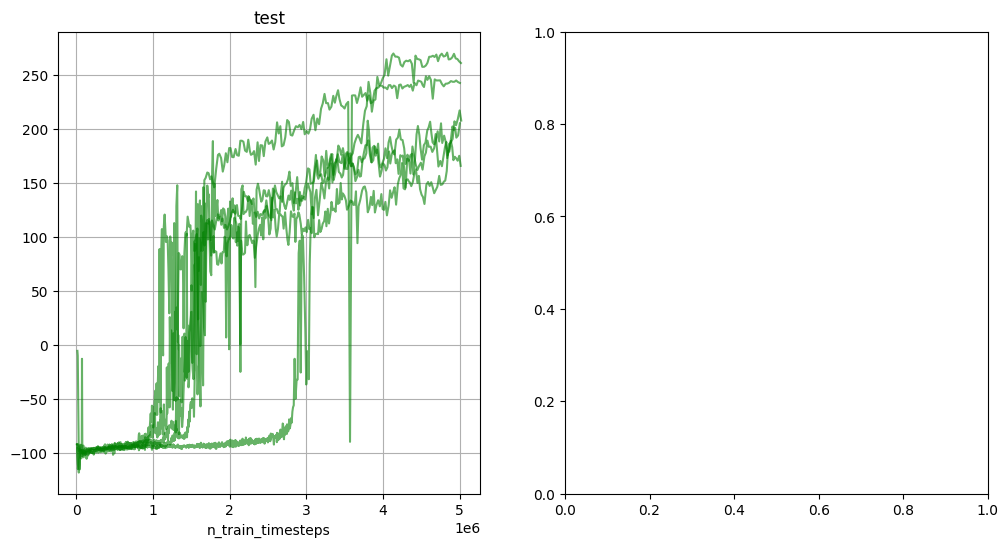

In [21]:
fig, (axes) = plt.subplots(1, 2, figsize=(12,6))


for ax, label in zip(axes, ("test",)):
    rl_data[(rl_data.env == 'BipedalWalker-v3') & (rl_data.method == 'ars-v2')].groupby("run")\
        .plot(x="n_train_timesteps", y=label, ax=ax, c='green', alpha=.6)
        
    ax.grid()
    ax.set_title(label)
    ax.get_legend().remove()

In [18]:
data[data.env.str.endswith("v4")].groupby(["method", "env"])['run'].max()

method     env           
ppo_large  Ant-v4             5
           HalfCheetah-v4     5
           Hopper-v4          5
           Humanoid-v4        5
           Swimmer-v4         5
           Walker2d-v4        5
ppo_small  Ant-v4             5
           HalfCheetah-v4     5
           Hopper-v4          5
           Humanoid-v4        5
           Swimmer-v4         5
           Walker2d-v4        5
sac_large  Ant-v4             5
           HalfCheetah-v4     5
           Hopper-v4          5
           Humanoid-v4        5
           Swimmer-v4         5
sac_small  Ant-v4             5
           HalfCheetah-v4     5
           Hopper-v4         10
           Humanoid-v4        5
           Swimmer-v4         7
Name: run, dtype: int64

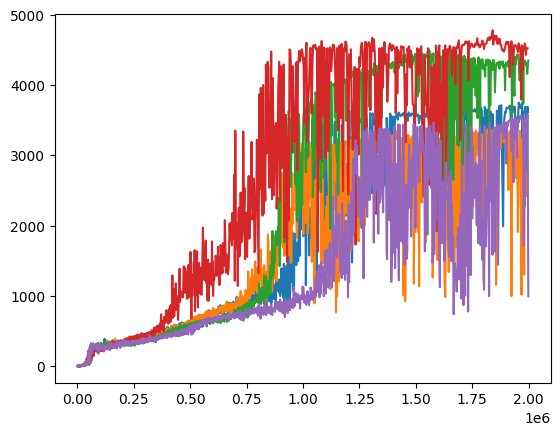

In [31]:
for _, group in data[(data.env == "Walker2d-v4") &  (data.method == "ppo_large")].groupby("run"):
    plt.plot(group.n_train_timesteps, group.test)